In [109]:
%matplotlib inline

import matplotlib
import pandas
import numpy as np
from matplotlib import pyplot as plt

data = pandas.read_csv('data-logistic.csv', header=None).as_matrix()
X = data[:, 1:]
y = data[:, :1]

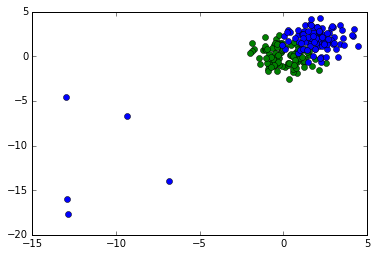

In [110]:
a = X[data[:, 0] < 0]
b = X[data[:, 0] > 0]

plt.plot(a[:, :1], a[:, 1:], 'go', b[:, :1], b[:, 1:], 'bo')
plt.show()